Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


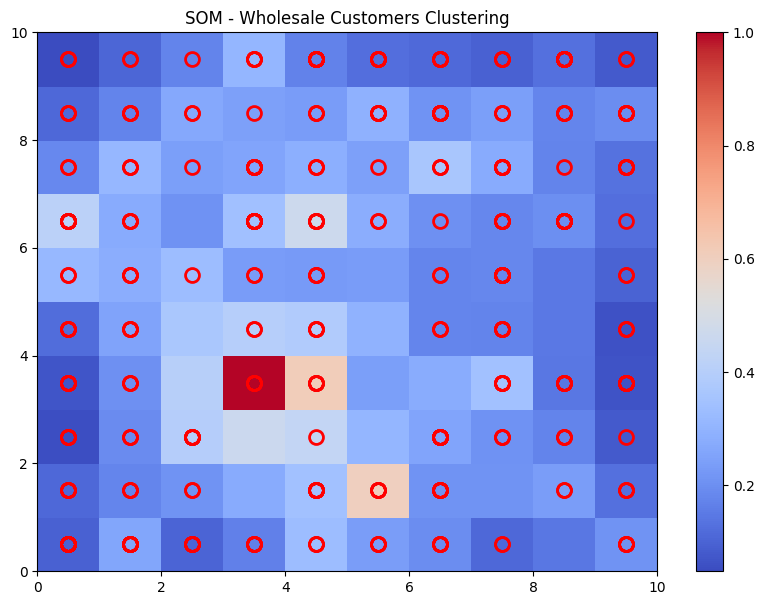

Total number of clusters: 86

Cluster at (np.int64(1), np.int64(8)): 4 points
Cluster at (np.int64(1), np.int64(6)): 4 points
Cluster at (np.int64(4), np.int64(9)): 12 points
Cluster at (np.int64(7), np.int64(4)): 6 points
Cluster at (np.int64(9), np.int64(5)): 2 points
Cluster at (np.int64(7), np.int64(0)): 2 points
Cluster at (np.int64(1), np.int64(2)): 3 points
Cluster at (np.int64(1), np.int64(3)): 3 points
Cluster at (np.int64(3), np.int64(6)): 15 points
Cluster at (np.int64(0), np.int64(9)): 3 points
Cluster at (np.int64(2), np.int64(0)): 7 points
Cluster at (np.int64(2), np.int64(2)): 8 points
Cluster at (np.int64(3), np.int64(7)): 9 points
Cluster at (np.int64(1), np.int64(5)): 4 points
Cluster at (np.int64(1), np.int64(1)): 3 points
Cluster at (np.int64(4), np.int64(7)): 3 points
Cluster at (np.int64(9), np.int64(3)): 9 points
Cluster at (np.int64(7), np.int64(3)): 6 points
Cluster at (np.int64(4), np.int64(6)): 6 points
Cluster at (np.int64(1), np.int64(4)): 4 points
Cluster 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

# Load the Wholesale Customers dataset
df = pd.read_csv('Wholesale customers data.csv')

# Print the column names to verify
print(df.columns)

# Selecting relevant features for SOM (using spending categories)
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[columns].values

# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)

# Visualize the SOM
plt.figure(figsize=(10, 7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Distance map as background
plt.colorbar()

# Add markers for each observation
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Getting the winning node
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', 
             markeredgecolor='r', markersize=10, markeredgewidth=2)

plt.title('SOM - Wholesale Customers Clustering')
plt.show()

# Get clusters
mappings = som.win_map(X_scaled)

# Count and print the number of clusters
total_clusters = len(mappings)
print(f'Total number of clusters: {total_clusters}\n')

# Print details of each cluster
for cluster, data_points in mappings.items():
    print(f'Cluster at {cluster}: {len(data_points)} points')